### we defined all libraries which are used in this project. Library is a core data which makes our coding simple and convenient.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import hvplot.pandas
import panel as pn
import holoviews as hv
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import math

### In the section, we read all datasets which are provided by our professor from the website. Also, specify an index column.

In [32]:
# Daily Dataset
VDailyVframe = pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueDailyVisitors.csv",index_col=0)
pd.plotting.register_matplotlib_converters()

# other 5 dataset
VAgeframe= pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueAge.csv",index_col=0)
VDistanceframe= pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueDistance.csv",index_col=0)
VDurationframe = pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueDuration.csv",index_col=0)
VGenderframe= pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueGender.csv",index_col=0)
VSpendframe = pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueSpend.csv",index_col=0)

### check and read daily data. We checked all venues' low, medium, average and standard deviation values using the describe method. This is the main step of implementation because we show any null values inside our data. So, we can do preprocessing steps before visualisation.

In [33]:
print(VDailyVframe.head())
print(VDailyVframe.tail())
print(VDailyVframe.describe())

            PDT  VLS  QRY  PXI  ZJB  YVW  ZFX  YRU  BEY  XLA  ...  XJT  AEQ  \
Date                                                          ...             
2019-01-01  285   65  220  515    0    0   75   64  241   96  ...   85    0   
2019-01-02  276   72  307  442    0    0  106   74  192   87  ...   69    0   
2019-01-03  216   70  216  433    0    0   79   62  154   77  ...   90    0   
2019-01-04  211   65  165  324    0    0   88   62  116  100  ...   83    0   
2019-01-05  185   51  187  312    0    0   93   55  174   91  ...   87    0   

            WXV  WFI  VRD  GLQ  ZLH  DKS  XFP  UZO  
Date                                                
2019-01-01   99   97   64   45   80  207   52   68  
2019-01-02   88   88   53   72   75  192   69   79  
2019-01-03   75   89   64   63   74  141   79   73  
2019-01-04   77   93   39   67   52  144   73   74  
2019-01-05   95   78   58   68   73  113   65   68  

[5 rows x 40 columns]
            PDT  VLS  QRY  PXI  ZJB  YVW  ZFX  YRU  

### Here, we merged all datasets into one frame including the DailyVisitor dataset. we merged the dataset by creating a new column then assigning the dataset from their name.

In [34]:
VDailyVframe1 = pd.read_csv("https://tinyurl.com/ChrisCoDV/001189309/VenueDailyVisitors.csv",index_col=0)
VDailyVframe1.index = pd.to_datetime(VDailyVframe.index)

combined_data = pd.DataFrame(index = VDailyVframe.columns)

#merge column according thier name
combined_data['VenueAge'] = VAgeframe.values
combined_data['VenueDisatnce'] = VDistanceframe.values
combined_data['VenueDuration'] = VDurationframe.values
combined_data['VenueGender'] = VGenderframe.values
combined_data['VenueSpend'] = VSpendframe.values
combined_data['VenueDailyVisitor'] = VDailyVframe1.mean()

### Now, I need to verify our combined dataframe. It is actually merged or not. So, I read our new dataframe using the print command.

In [35]:
print(combined_data.describe())

        VenueAge  VenueDisatnce  VenueDuration  VenueGender  VenueSpend  \
count  40.000000      40.000000       40.00000    40.000000   40.000000   
mean   38.825000      13.175000       97.80000    50.375000   21.575000   
std    10.104296      14.570584       26.00217     6.319232    6.927787   
min    22.000000       1.000000       61.00000    41.000000   12.000000   
25%    29.000000       5.000000       73.25000    45.000000   16.000000   
50%    39.500000       8.000000       96.50000    50.000000   19.500000   
75%    48.000000      13.500000      120.25000    55.500000   25.750000   
max    55.000000      64.000000      154.00000    60.000000   36.000000   

       VenueDailyVisitor  
count          40.000000  
mean          128.078562  
std           127.675701  
min            13.268493  
25%            62.628767  
50%            75.254795  
75%           157.616438  
max           529.282192  


## Investigation on DailyVisitorData

### we visualised bar graph Daily_visitor VS Date and gave specific visitor numbers to divide into categories. Also, we provided colors to categories which are green for high visitor venues, orange for average visitors venues and red for low visitor venues. According to the bar graph, we can decide venues which have higher, average and low visitors.

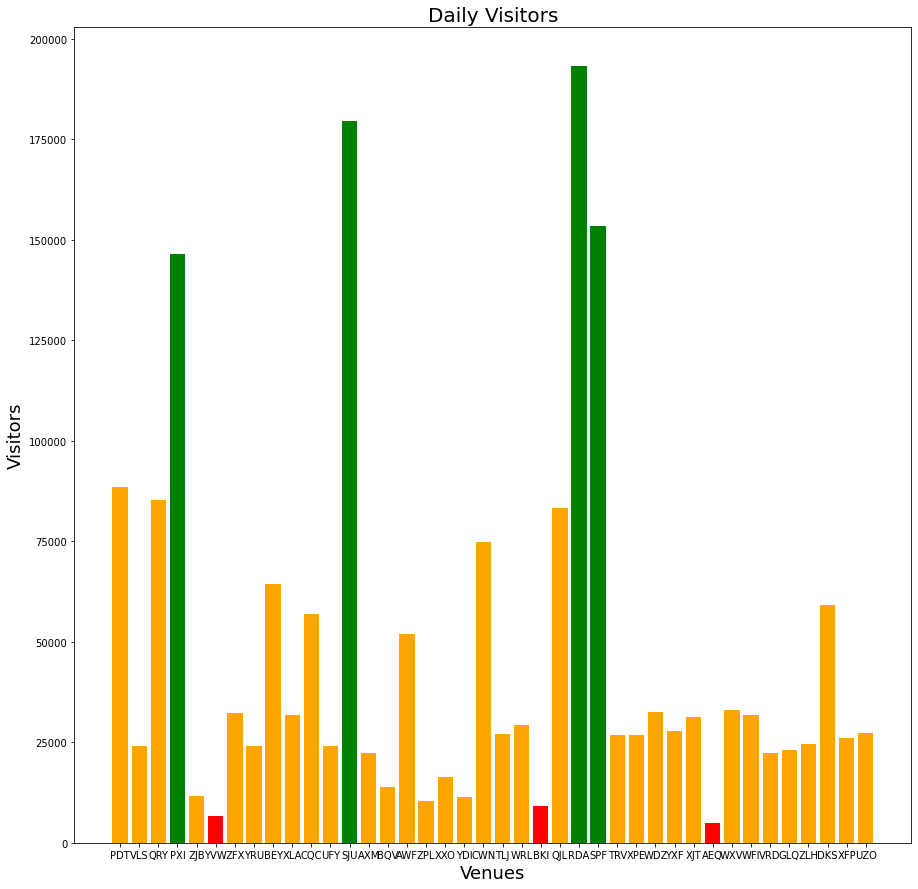

In [36]:
colours = []
for name in VDailyVframe.columns:
    total_visitor = VDailyVframe[name].sum()
    if total_visitor > 100000:
        colour = 'green'
    elif total_visitor > 10000:
        colour = 'orange'
    else:
        colour = 'red'
    colours.append(colour)

plt.figure(figsize=(15, 15))
x_pos = np.arange(len(VDailyVframe.columns))
plt.bar(x_pos, VDailyVframe.sum(), align='center', color=colours)
plt.xticks(x_pos, VDailyVframe.columns)
plt.xlabel('Venues', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('Daily Visitors', fontsize=20)
plt.show()

### we used FOR loop to declare venues which are going to which categories such as high, medium and low.

In [37]:
categories = ['High', 'Medium', 'Low']
categories_selected = [[] for i in range(len(categories))]
for value in VDailyVframe.columns:
    total_visitors = VDailyVframe[value].sum()
    if total_visitors >= 100000:
        category = 0
    elif total_visitors <100000 and total_visitors >= 10000:
        category = 1
    else:
        category = 2
    categories_selected[category].append(value)
    print('Venue ' + value + ' is ' + categories[category] + ' visitors')

Venue PDT is Medium visitors
Venue VLS is Medium visitors
Venue QRY is Medium visitors
Venue PXI is High visitors
Venue ZJB is Medium visitors
Venue YVW is Low visitors
Venue ZFX is Medium visitors
Venue YRU is Medium visitors
Venue BEY is Medium visitors
Venue XLA is Medium visitors
Venue CQC is Medium visitors
Venue UFY is Medium visitors
Venue SJU is High visitors
Venue AXM is Medium visitors
Venue BQV is Medium visitors
Venue AWF is Medium visitors
Venue ZPL is Medium visitors
Venue XXO is Medium visitors
Venue YDI is Medium visitors
Venue CWN is Medium visitors
Venue TLJ is Medium visitors
Venue WRL is Medium visitors
Venue BKI is Low visitors
Venue QJL is Medium visitors
Venue RDA is High visitors
Venue SPF is High visitors
Venue TRV is Medium visitors
Venue XPE is Medium visitors
Venue WDZ is Medium visitors
Venue YXF is Medium visitors
Venue XJT is Medium visitors
Venue AEQ is Low visitors
Venue WXV is Medium visitors
Venue WFI is Medium visitors
Venue VRD is Medium visitors
Ve

### In this part, we used two loops. One is to select categories and the other one is to create a bar graph according to our categories.

High: ['PXI', 'SJU', 'RDA', 'SPF']
Medium: ['PDT', 'VLS', 'QRY', 'ZJB', 'ZFX', 'YRU', 'BEY', 'XLA', 'CQC', 'UFY', 'AXM', 'BQV', 'AWF', 'ZPL', 'XXO', 'YDI', 'CWN', 'TLJ', 'WRL', 'QJL', 'TRV', 'XPE', 'WDZ', 'YXF', 'XJT', 'WXV', 'WFI', 'VRD', 'GLQ', 'ZLH', 'DKS', 'XFP', 'UZO']
Low: ['YVW', 'BKI', 'AEQ']


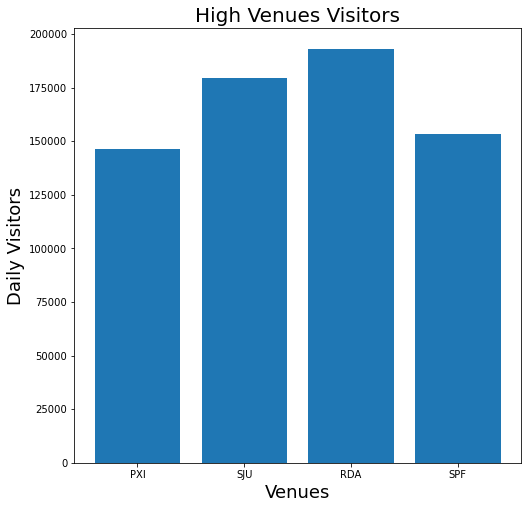

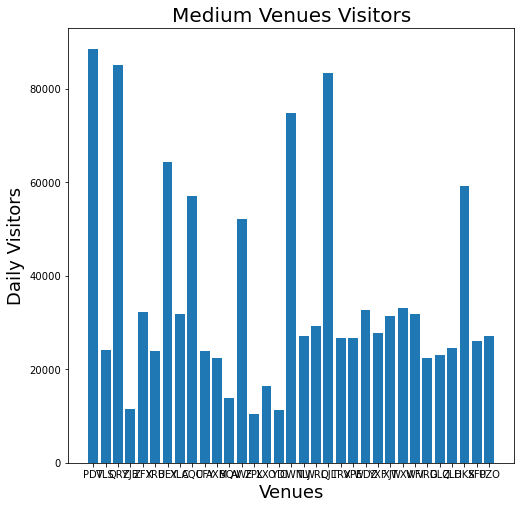

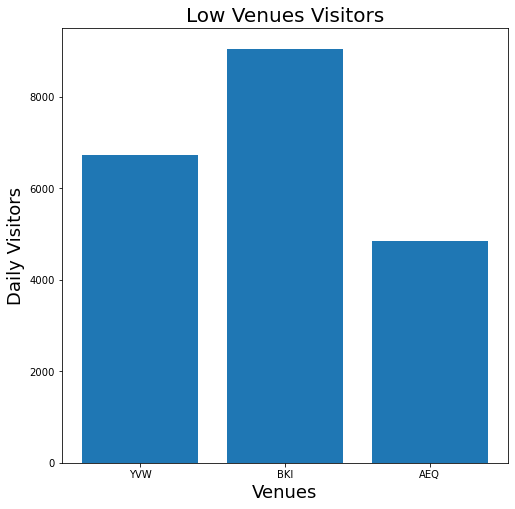

In [38]:
for i in range(len(categories)):
    print(categories[i] + ': ' + str(categories_selected[i]))

for i, selected in enumerate(categories_selected):
    plt.figure(figsize=(8, 8))
    x_pos = np.arange(len(VDailyVframe[selected].columns))
    plt.bar(x_pos, VDailyVframe[selected].sum(), align='center')
    plt.xticks(x_pos, VDailyVframe[selected].columns)
    plt.xlabel('Venues', fontsize=18)
    plt.ylabel('Daily Visitors', fontsize=18)
    plt.title(categories[i] + ' Venues Visitors', fontsize=20)
    plt.show()

### Below, we defined three lists according our high, medium and low venues, so we can easily get venues by categories wise. After that, we no need to create second time categories in following implementation. we can access from here to everywhere in our project.

In [39]:
Hselected = ['PXI', 'SJU', 'RDA', 'SPF']
Mselected = ['PDT', 'VLS', 'QRY', 'ZJB', 'ZFX', 'YRU', 'BEY', 'XLA', 'CQC', 'UFY', 'AXM', 'BQV', 'AWF', 'ZPL', 'XXO', 'YDI', 'CWN', 'TLJ', 'WRL', 'QJL', 'TRV', 'XPE', 'WDZ', 'YXF', 'XJT', 'WXV', 'WFI', 'VRD', 'GLQ', 'ZLH', 'DKS', 'XFP', 'UZO']
Lselected = ['YVW', 'BKI', 'AEQ']

### we create a line graph for checking our visitor according date wise. But we can not decide the trend of venues which are going upward , downward or constantly.

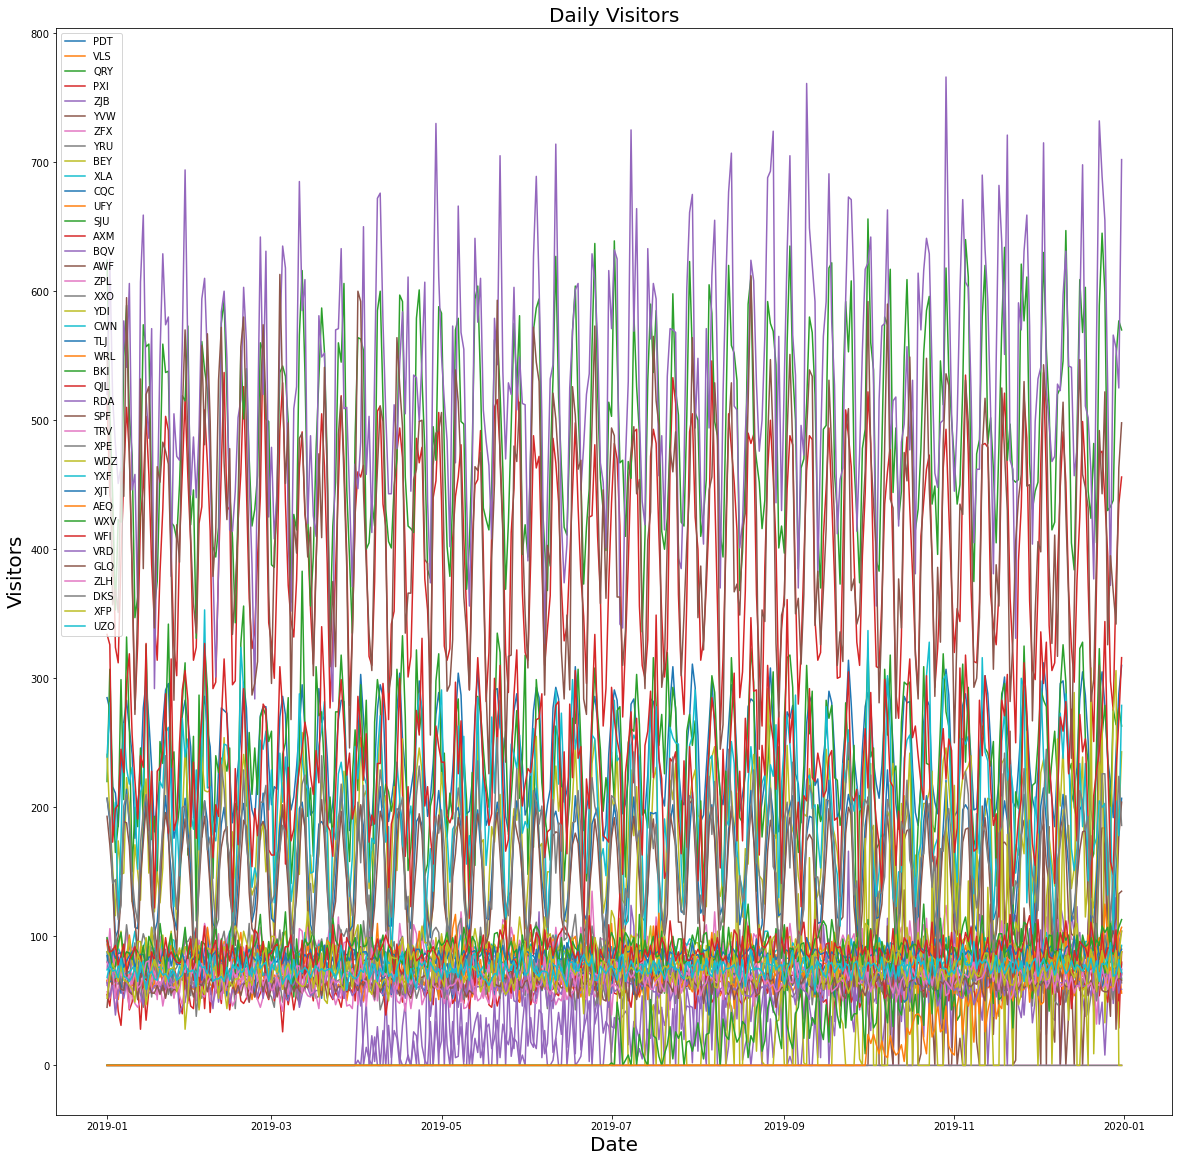

In [40]:
plt.figure(figsize=(20,20))
plt.plot(VDailyVframe1)
plt.title('Daily Visitors', fontsize=20)
plt.legend(VDailyVframe1.columns, loc=2)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Visitors', fontsize=20)
plt.show()

### We again created the line graph, But, it is different from the above plot. Because, this time line graph is a 21 day rolling average plot. so, we can make a decision that we didn't make before from the above graph.

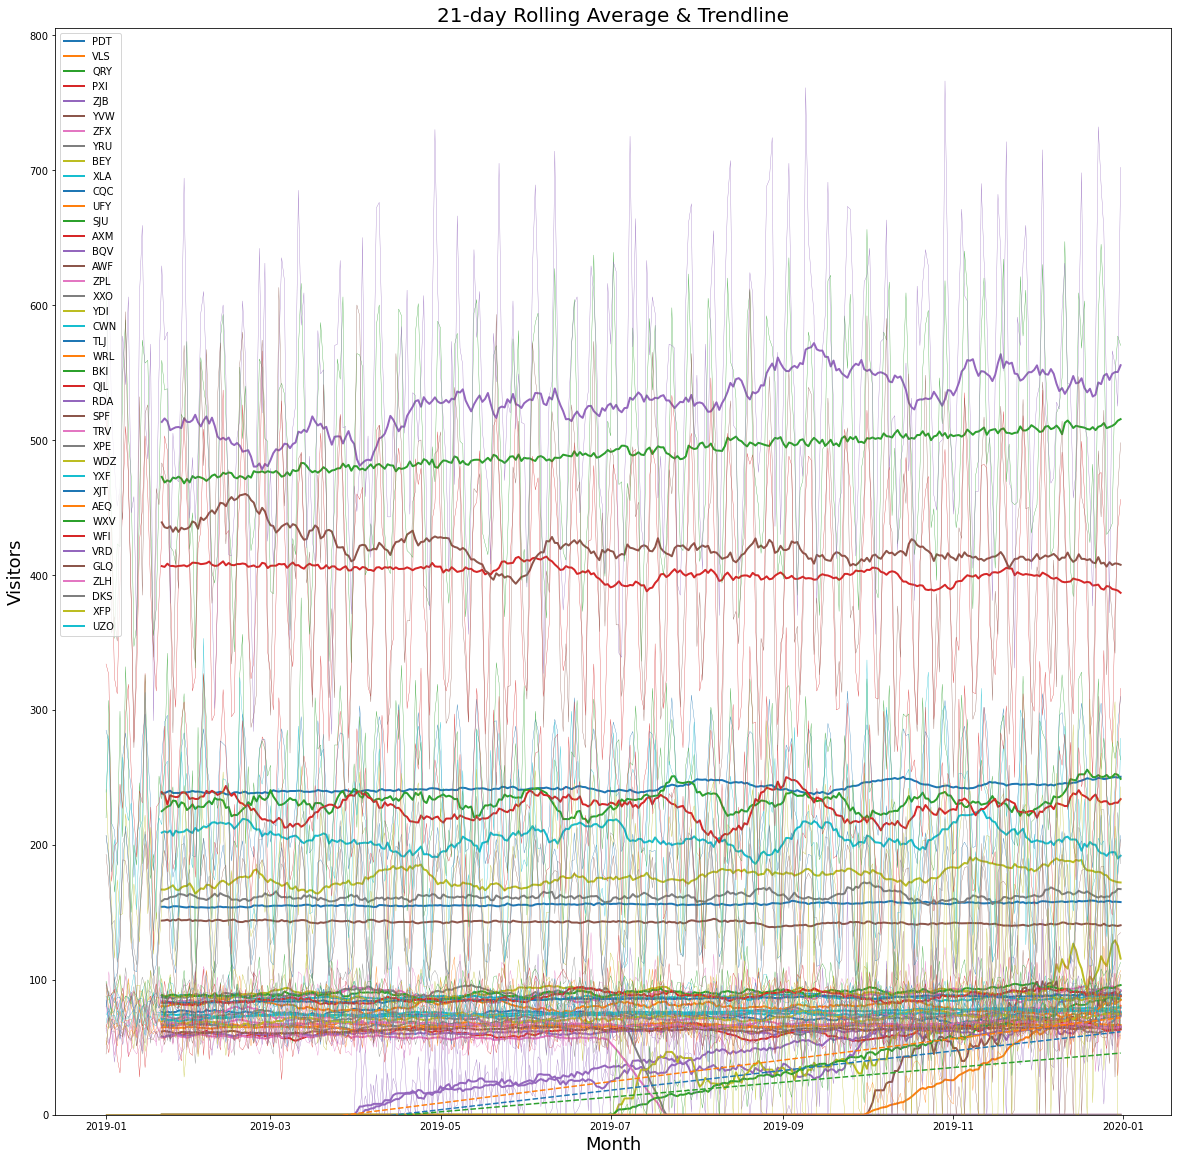

In [41]:
period = 21
rolling_average = VDailyVframe1.rolling(window=period).mean()
plt.figure(figsize=(20, 20))
plt.plot(rolling_average[VDailyVframe1.columns], linewidth=2)
plt.gca().set_prop_cycle(None)
plt.plot(VDailyVframe1[VDailyVframe1.columns], linewidth=0.3)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(VDailyVframe1[name]))
    z = np.polyfit(x, VDailyVframe1[name], 1)
    trend = np.poly1d(z)
    plt.plot(VDailyVframe1.index, trend(x), linestyle='--')
plt.ylim(ymin=0)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Visitors', fontsize=18)
plt.title('21-day Rolling Average & Trendline', fontsize=20)
plt.legend(VDailyVframe1.columns, loc=2)
plt.show()

### Still, it is not enough to make a decision from all above graphs. On this part, we display only trend monthly time series for venues which are closed and open during time periods because I can easily see this clear trend using the rolling function.

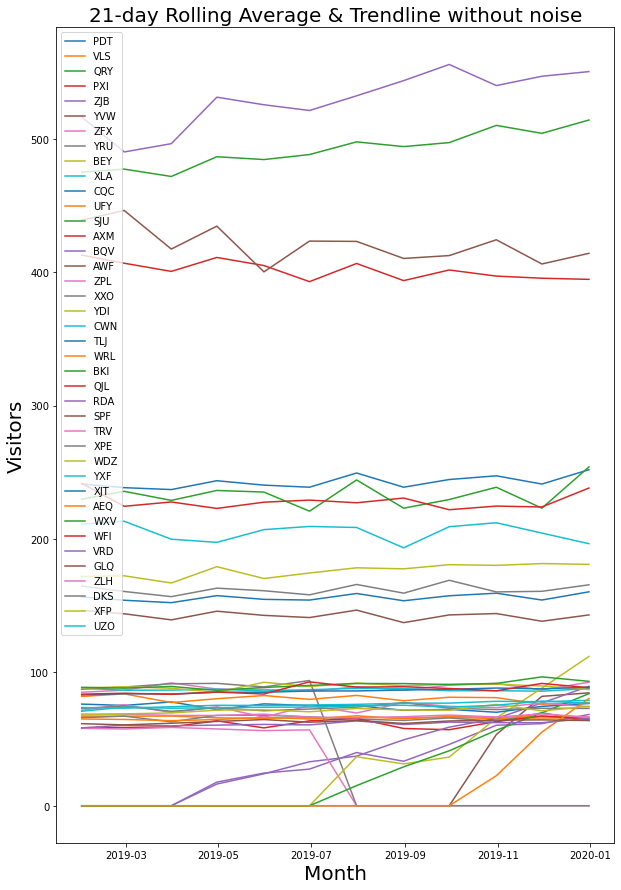

In [42]:
sample_rate = 'M'
average_data = VDailyVframe1.resample(sample_rate).mean()
plt.figure(figsize=(10,15))
plt.plot(average_data)
plt.title('21-day Rolling Average & Trendline without noise', fontsize=20)
plt.legend(VDailyVframe1.columns, loc=2)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Visitors', fontsize=20)
plt.show()

### We have created a dashboard system for daily visitors. This system displays high, medium and low time series in one graph. It is very interactive and easy to understand for showing three series in one frame. Also, we perform many operations on time series like zoomin, reset, applying rolling function, divide three categories and more.

In [43]:
time_title = '## Time-Series'
volumes = ['high', 'medium', 'low']
select = []

pn.extension()

def linegraph(volume, window_size, date_range):
    if volume == 'high':
        select = Hselected
    elif volume == 'medium':
        select = Mselected
    else:
        select = Lselected
    frame = VDailyVframe1[select] # selected venues
    frame = frame.rolling(window=window_size).mean() # calculate rolling average
    frame = frame.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    return frame.hvplot.line(frame_width=600, grid=True)

def update_time_row(event):
    time_row[1].object = linegraph(volume.value, day_avg.value, time_date_range.value)

    
volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Rolling Day', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(VDailyVframe1.index[0], VDailyVframe1.index[-1]),
                                        start=VDailyVframe1.index[0], end=VDailyVframe1.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    linegraph(volume.value, day_avg.value, time_date_range.value)
)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['high', 'medium', 'low'], value='high', width=200)
        [2] IntSlider(end=21, name='Rolling Day', start=1, value=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(NdOverlay)

# Interactive Dashboards
## Instructions
### On the Right hand corner we have a tool box with the help of those tools we can interact with the Dashboards
### 1. Pan Tool - we can use for panning the graphs 
### 2. Box Zoom - we can use for Zooming selected part of a graph
### 3. Scroll Zoom - we can use for Zooming and Scrolling it at the same time
### 4. Save Tool - Save Tool is used for saving the graph locally
### 5. Reset Tool - Reset tool is used for resetting the graph it will drop all the changes 
### 6. Hover Tool - Hover tool is used while hovering it on the graph - there and then we will get insights of particular part

### In this section, we created the same dashboards as we created the above dashboard system but, a little difference between time series and correlation. Correlation gives the relationship between two variables like how they are connected to each other. For example, E-bike sales increase along with production of electricity, that is positive relations likewise the same negative and neutral(zero) relationship. Here, we compare all venues vs all venues. In one frame we provide specific two venues and time limits for analysis and another one provides all possible correlation results.

In [44]:
# correlation 
def get_correlation_plots(ax_x, ax_y, date_range):
    frame = VDailyVframe1.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    return frame.hvplot.scatter(frame_height=200, frame_width=250,
                             x=ax_x, y=ax_y, title=ax_x + ' vs ' + ax_y, size=10, padding=0.1) +\
           frame.corr().hvplot.heatmap(frame_height=200, frame_width=300, title='Venue correlations', 
                                       rot=90, cmap='coolwarm').opts(invert_yaxis=True, clim=(-1, 1))

def update_correlation_row(event):
    correlation_row[1].object = get_correlation_plots(ax_x.value, ax_y.value, corr_date_range.value)
    
correlation_title = '### Correlations'

ax_x = pn.widgets.Select(name='x-axis', options=list(VDailyVframe1.columns), width=200)
ax_y = pn.widgets.Select(name='y-axis', options=list(VDailyVframe1.columns), width=200)
corr_date_range = pn.widgets.DateRangeSlider(name='Dates',
                                        value=(VDailyVframe1.index[0], VDailyVframe1.index[-1]),
                                        start=VDailyVframe1.index[0], end=VDailyVframe1.index[-1], width=200)

correlation_row = pn.Row(
    pn.Column(correlation_title, ax_x, ax_y, corr_date_range),
    get_correlation_plots(ax_x.value, ax_y.value, corr_date_range.value)
)

ax_x.param.watch(update_correlation_row, 'value')
ax_y.param.watch(update_correlation_row, 'value')
corr_date_range.param.watch(update_correlation_row, 'value')

correlation_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='x-axis', options=['PDT', 'VLS', ...], value='PDT', width=200)
        [2] Select(name='y-axis', options=['PDT', 'VLS', ...], value='PDT', width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_end=Timestamp('2019-12-31 0..., value_start=Timestamp('2019-01-01 0..., width=200)
    [1] HoloViews(Layout)

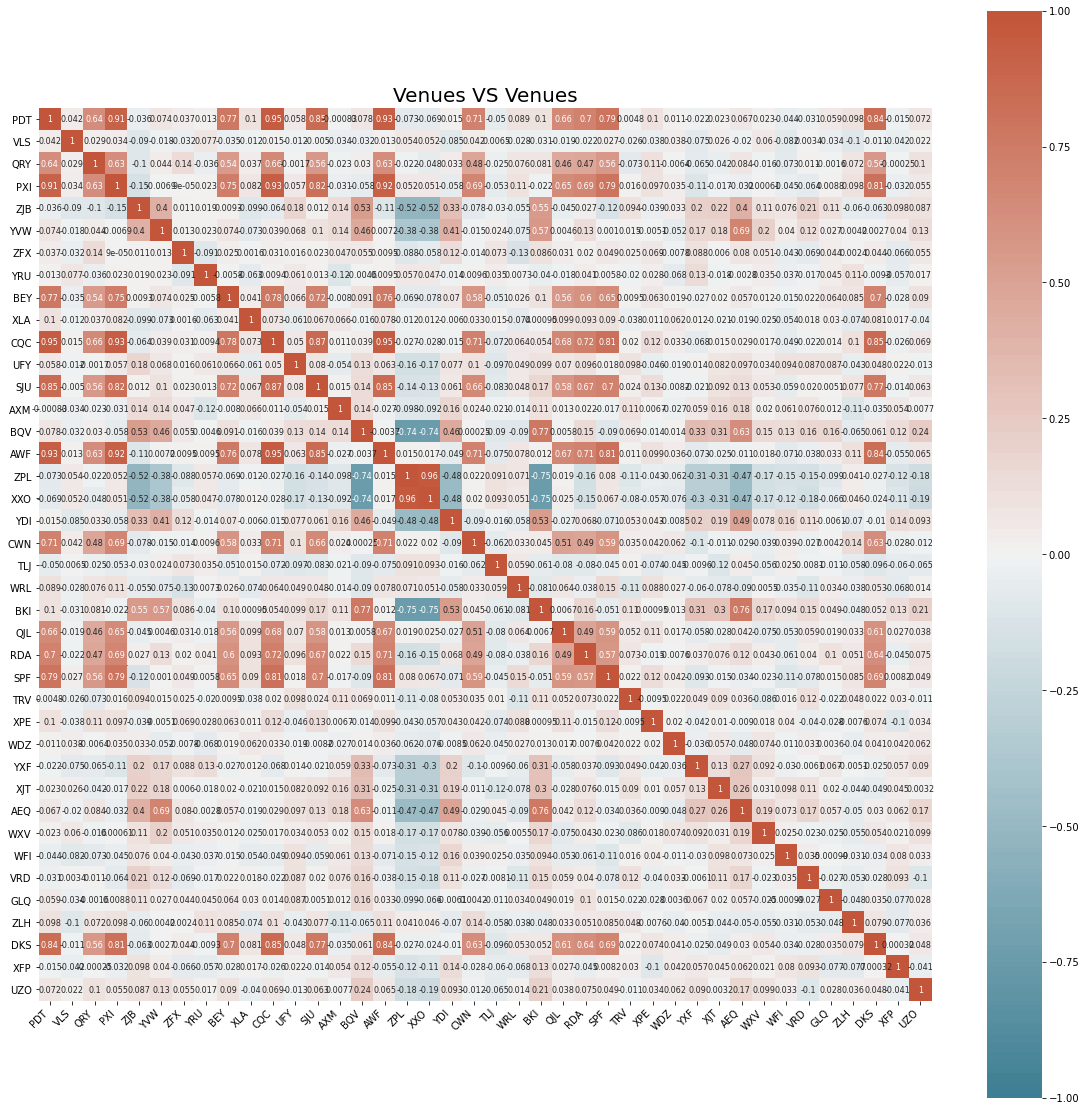

In [45]:
# just for understanding
plt.figure(figsize=(20, 20))
correct = VDailyVframe[VDailyVframe.columns].corr()
cocorre = sns.heatmap(correct, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
cocorre.set_xticklabels(cocorre.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Venues VS Venues', fontsize=20)
plt.show()

### We created Interactive histogram which is similar to dashboard type for displaying visitor visits in one day in high venues. The histogram shows the distribution of high visitors venues, In which PXI and SPF venues are most visited to other venues from the high visitor list.

In [46]:
x_min = 250
x_max = 550
bin_width = 10
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plot = VDailyVframe1[Hselected].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Visitor Per Day', ylabel='Frequency of Visitor',
    title='High Visitors in venue',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    bins=bins
)
hvplot.show(plot)

31 bins
Launching server at http://localhost:54994


### We created a box plot for finding an outlier for each venue. Also, box plot use for normal distribution. It gives minimum, Q1(first quartile means 25%), Q2 (median means 50%), Q3(third quartile means 75%), IQR (Inter quartile range means Q3-Q1) and maximum values. Here, our main focus is on outliers because it makes a huge impact on results. 

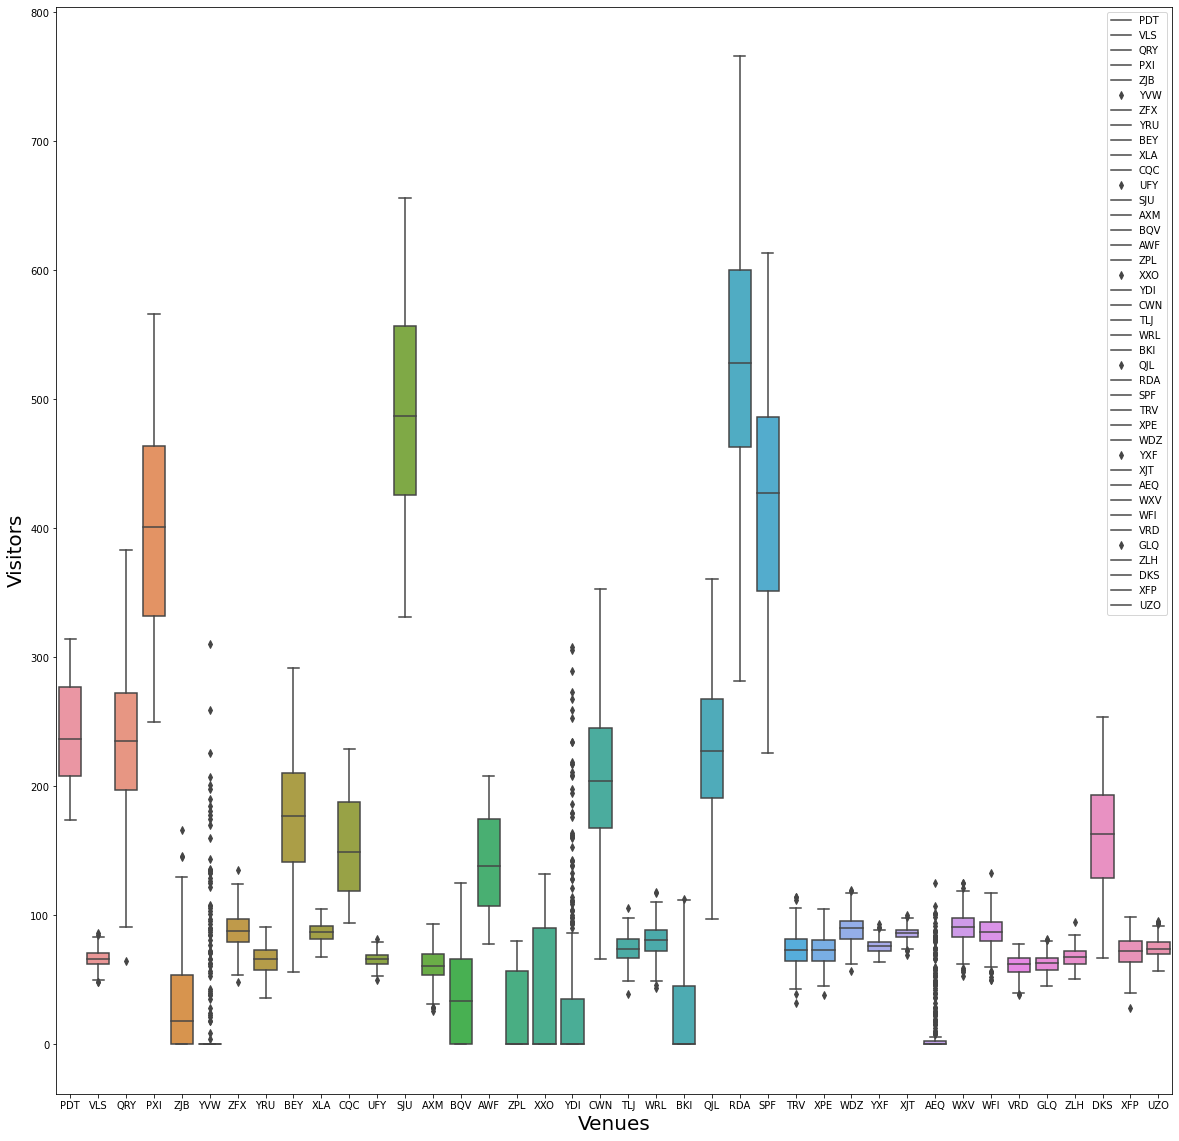

In [47]:
plt.figure(figsize=(20,20))
sns.boxplot(data = VDailyVframe)
plt.xlabel('Venues', fontsize=20)
plt.ylabel('Visitors', fontsize=20)
plt.legend(VDailyVframe.columns)
plt.show()

### Autocorrelation plots show the similarity between the real-time value and the previous value of the variable. The output will be in three categories such as negative, positive, and independent of each other. Autocorrelation has a default limit between -1 to 1. It will be useful to make a decision for more people visiting the place and earning profit. Here, we visualize an autocorrelation graph for high and medium venues and give a specific range for correlation values between 0.5 to -0.5 means -0.5 to 0 is a negative trend and 0 to 0.5 is a positive trend. The higher visitor venues trend is positive and the medium visitor venues trend is mixed negative and positive. Some of the venues are between our given limit means it’s neutral. But, ZJB, XXO, BQV, ZPL, and YDI venues are very famous during their establishment after that, popularity goes down, and then it increases in popularity. Now, those venues are average visitors. 

['PXI', 'SJU', 'RDA', 'SPF', 'PDT', 'VLS', 'QRY', 'ZJB', 'ZFX', 'YRU', 'BEY', 'XLA', 'CQC', 'UFY', 'AXM', 'BQV', 'AWF', 'ZPL', 'XXO', 'YDI', 'CWN', 'TLJ', 'WRL', 'QJL', 'TRV', 'XPE', 'WDZ', 'YXF', 'XJT', 'WXV', 'WFI', 'VRD', 'GLQ', 'ZLH', 'DKS', 'XFP', 'UZO']


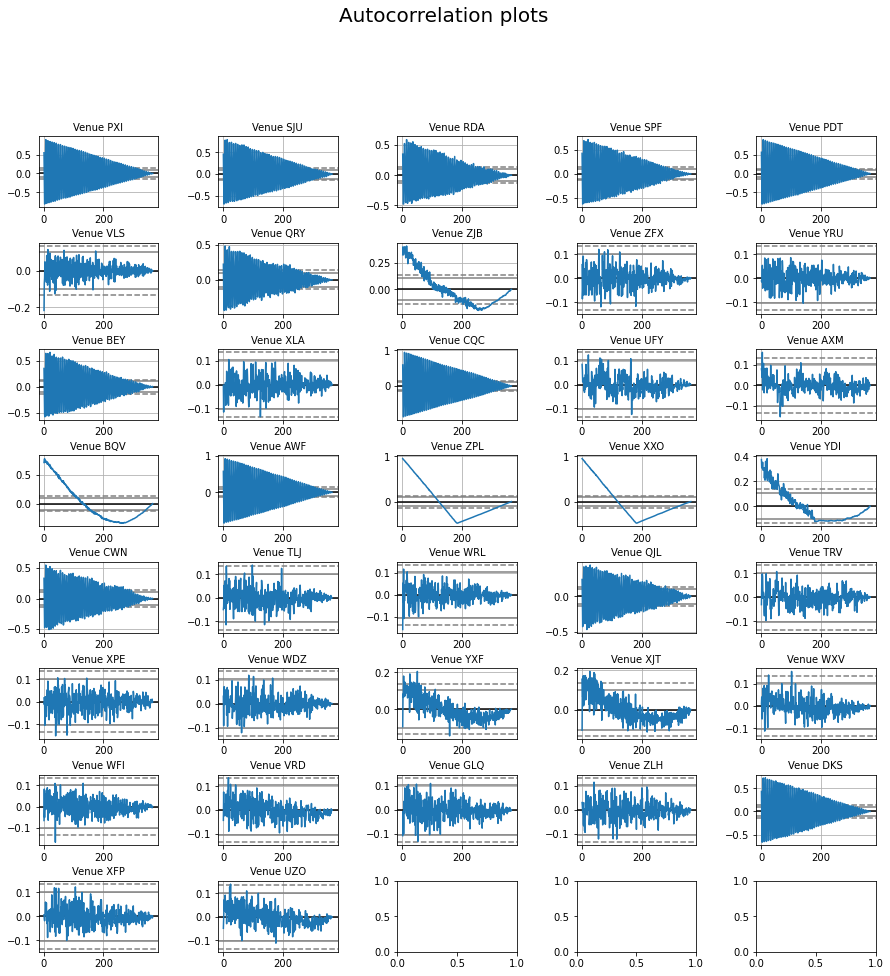

In [48]:
con = Hselected + Mselected
print(con)
row = 0
col = 0
fig, axes = plt.subplots(figsize=(15, 15), nrows=8, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in VDailyVframe[con].columns:
    sub = pd.plotting.autocorrelation_plot(VDailyVframe[name], axes[row, col])
    sub.set_title('Venue ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### here, we display only high level of daily visitor time series using the Autocorrelatopn method.

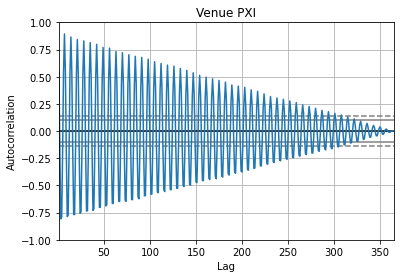

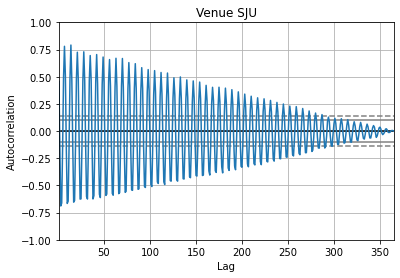

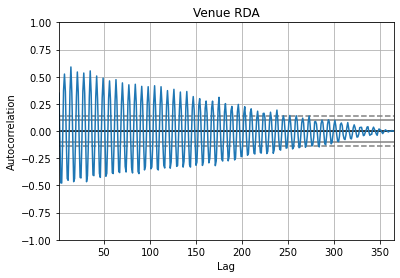

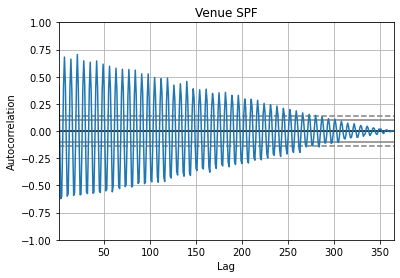

In [49]:
for name in VDailyVframe[Hselected]:
    pd.plotting.autocorrelation_plot(VDailyVframe[name])
    # plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Venue ' + name)
    plt.show()

### here, we display only medium level of daily visitor time series using the Autocorrelatopn method.

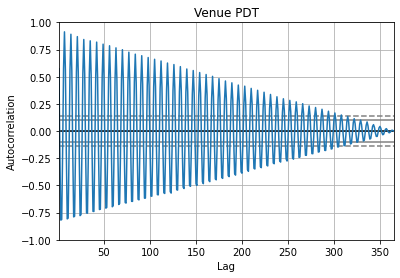

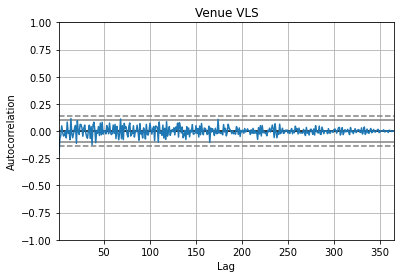

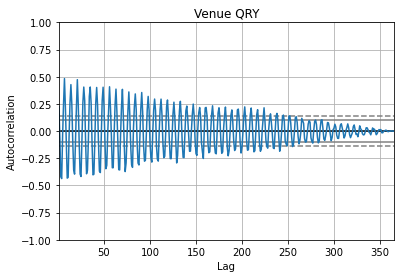

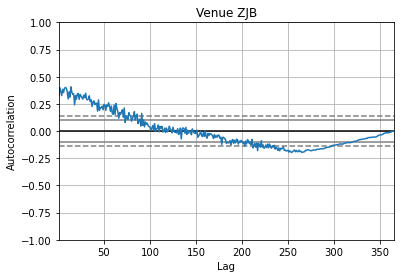

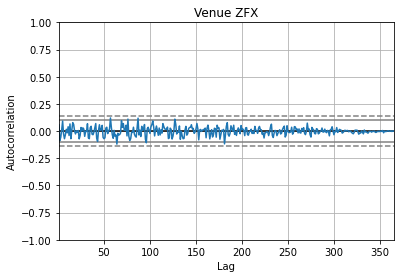

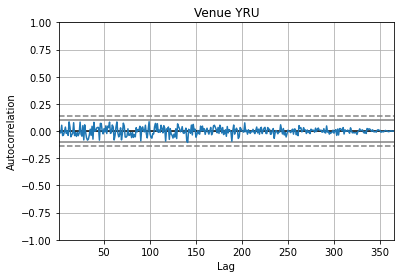

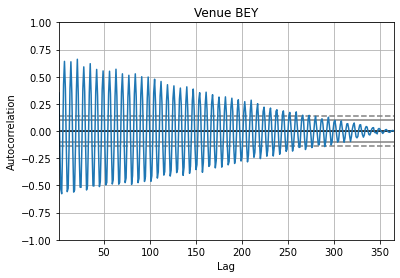

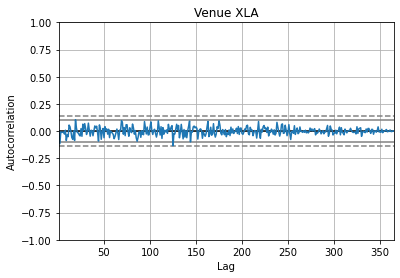

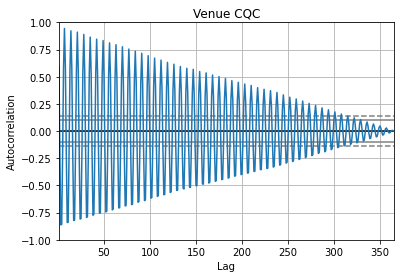

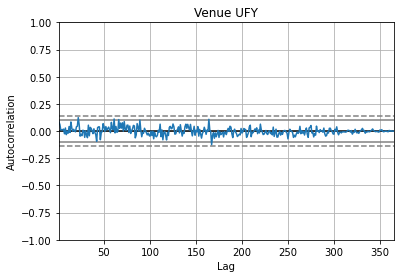

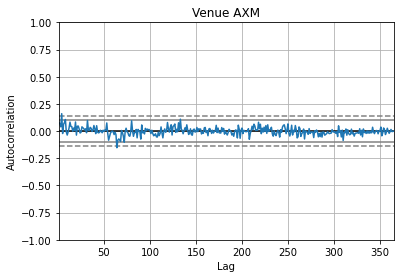

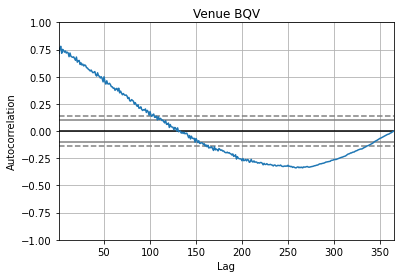

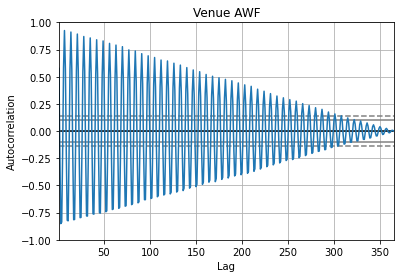

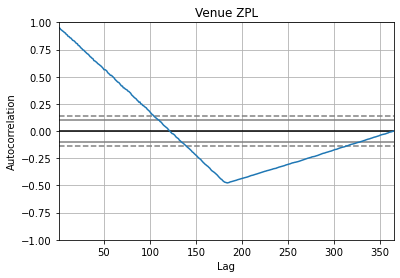

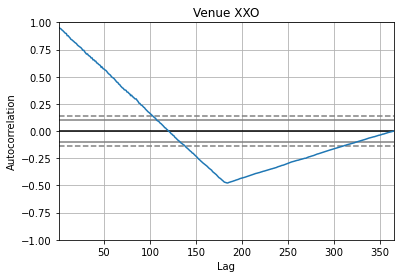

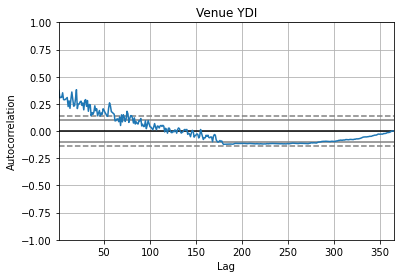

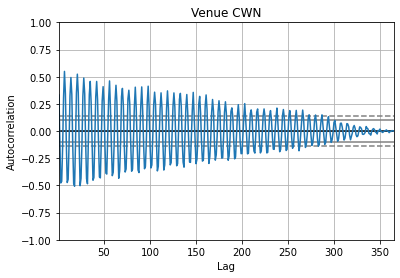

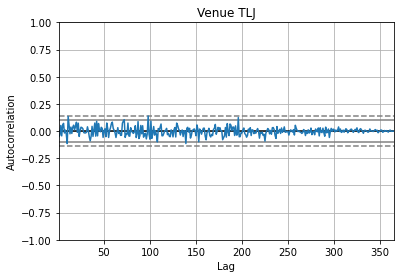

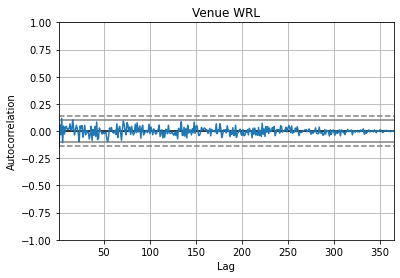

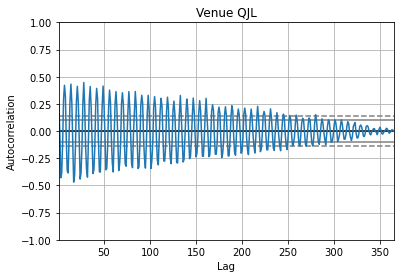

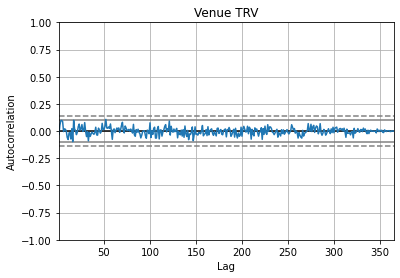

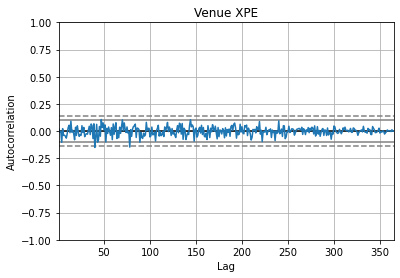

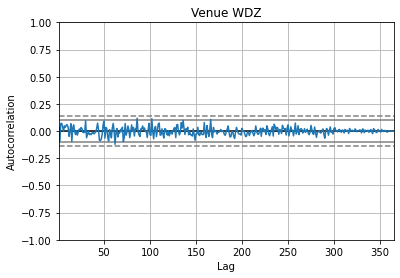

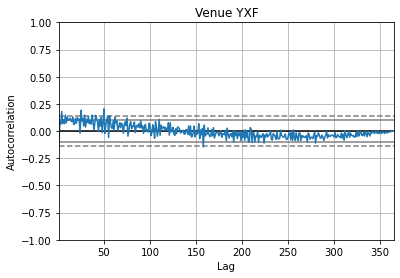

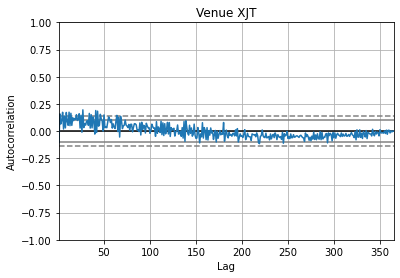

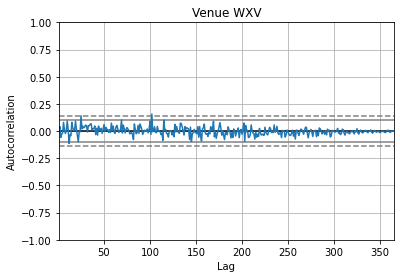

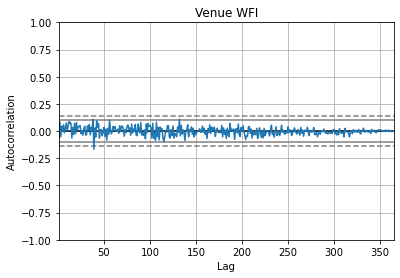

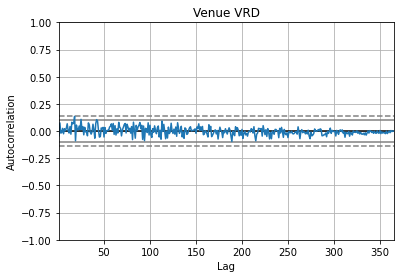

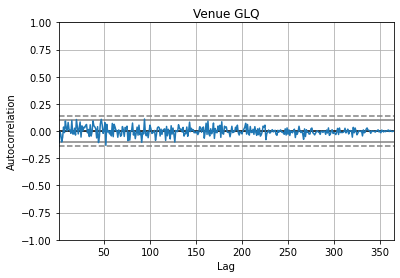

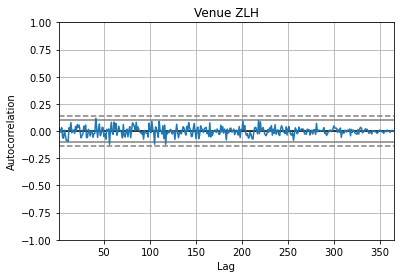

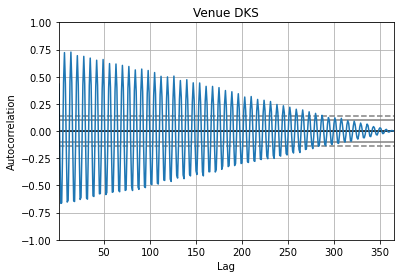

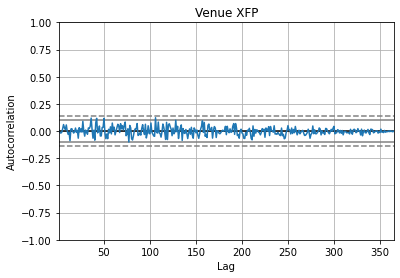

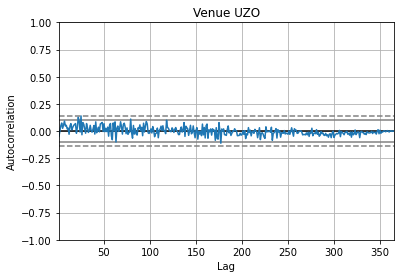

In [50]:
for name in VDailyVframe[Mselected]:
    pd.plotting.autocorrelation_plot(VDailyVframe[name])
    # plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Venue ' + name)
    plt.show()

### here, we display only Low level of daily visitor time series using the Autocorrelatopn method.

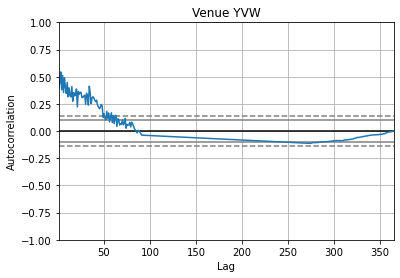

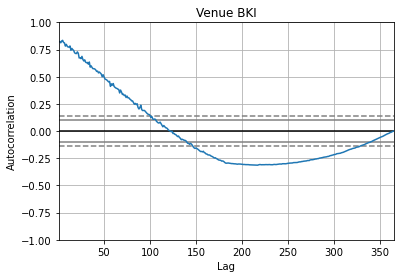

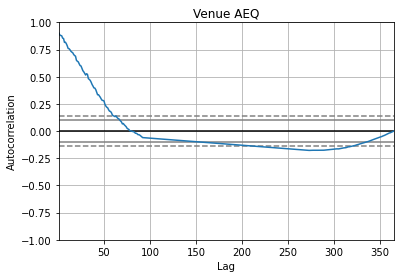

In [51]:
for name in VDailyVframe[Lselected]:
    pd.plotting.autocorrelation_plot(VDailyVframe[name])
    # plt.xlim([0, 50]) # uncomment this line to zoom in
    plt.title('Venue ' + name)
    plt.show()

### here, we display high time series seasonality means trend, seasonal and residual.

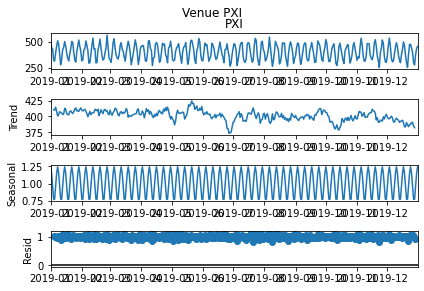

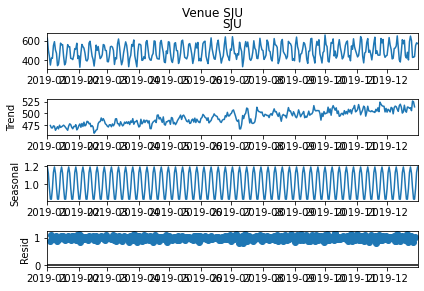

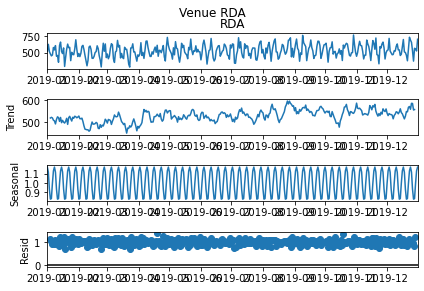

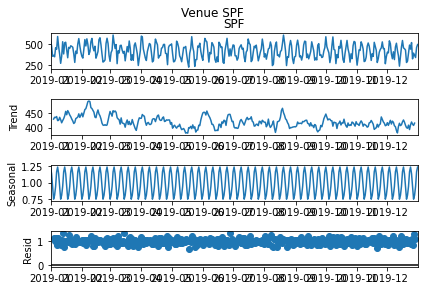

In [52]:
for name in Hselected:
    result = seasonal_decompose(VDailyVframe1[name], model='multiplicative', period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

### here, we display medium time series seasonality means trend, seasonal and residual.

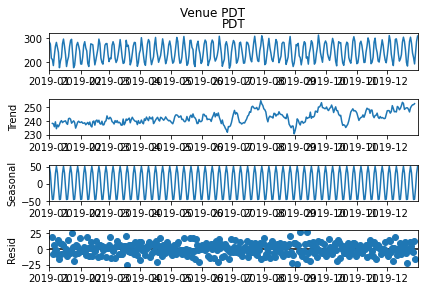

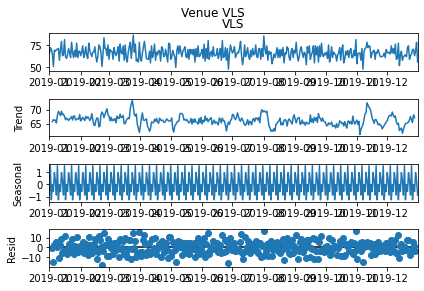

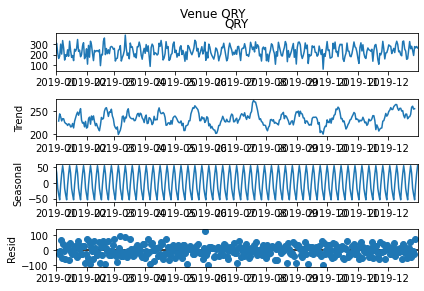

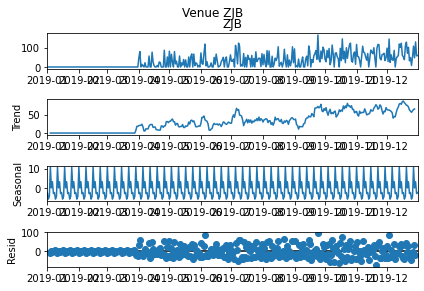

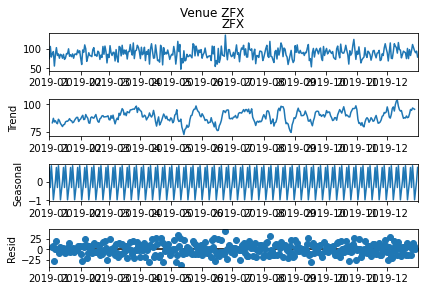

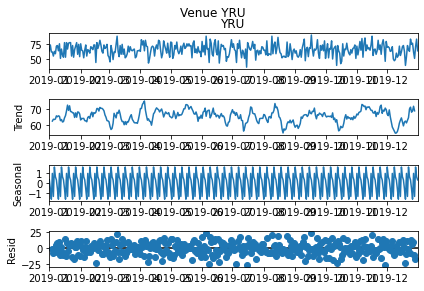

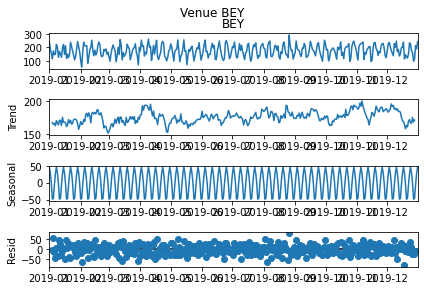

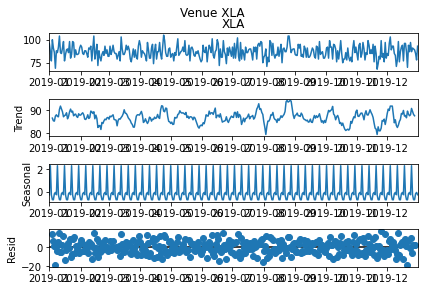

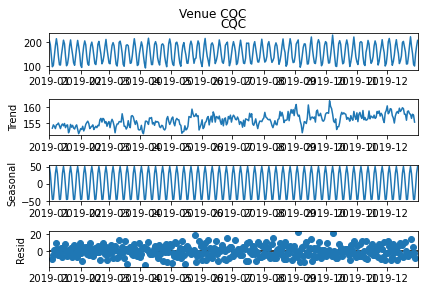

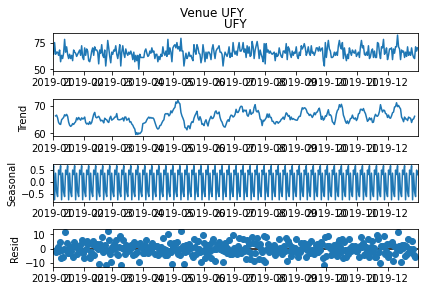

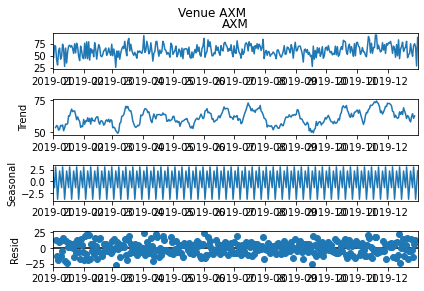

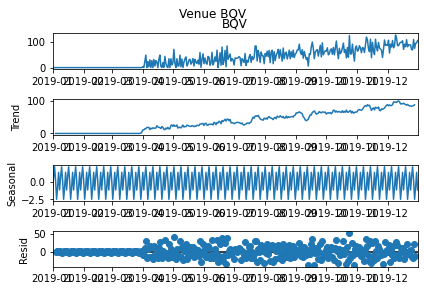

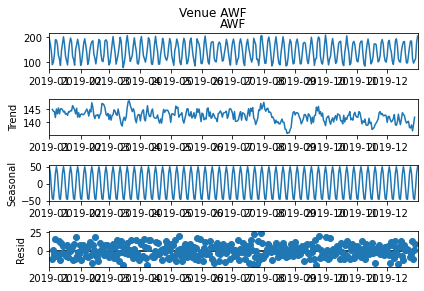

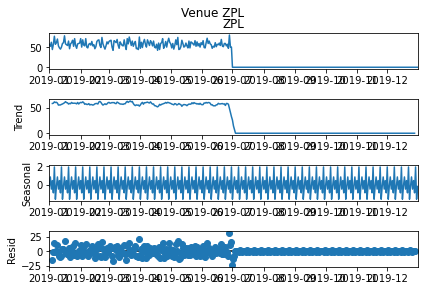

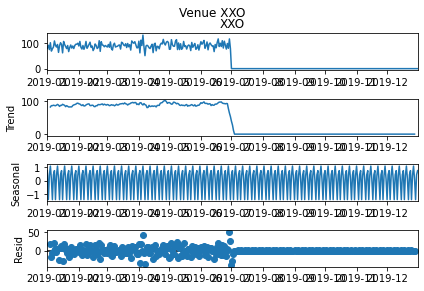

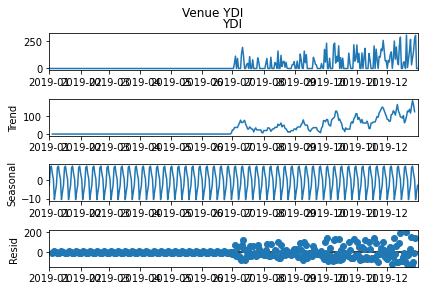

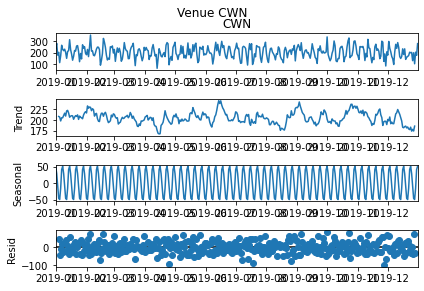

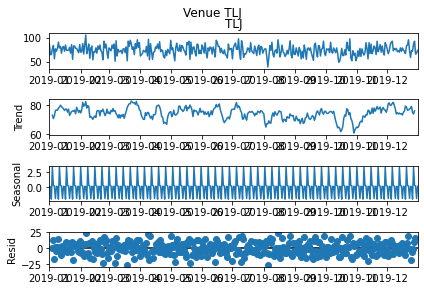

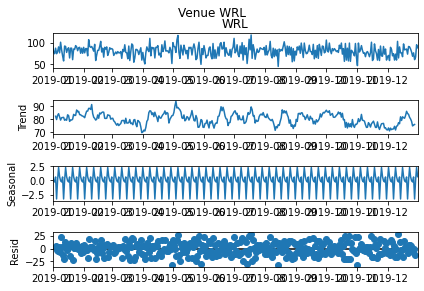

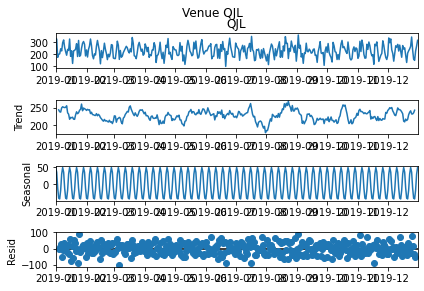

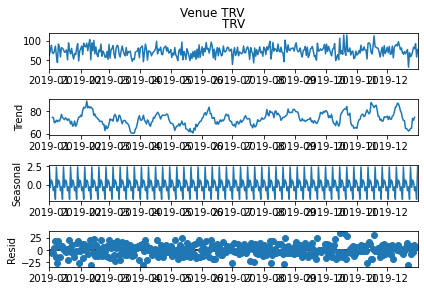

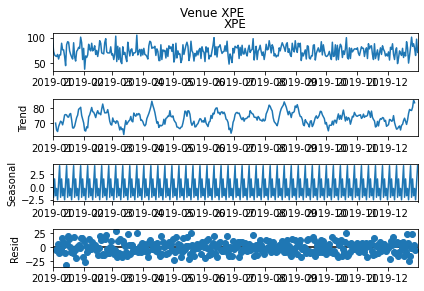

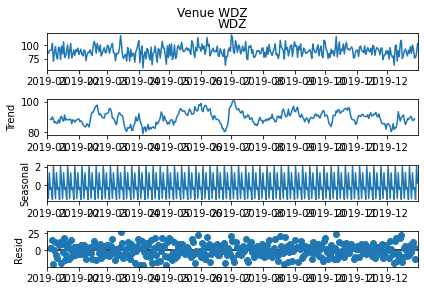

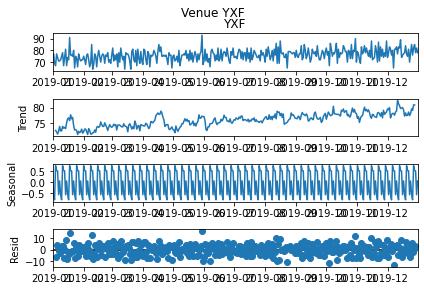

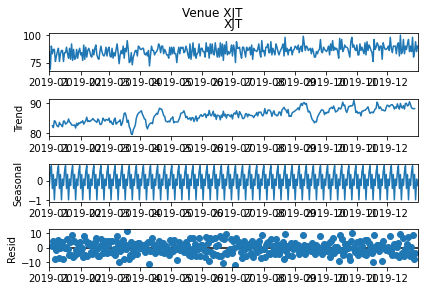

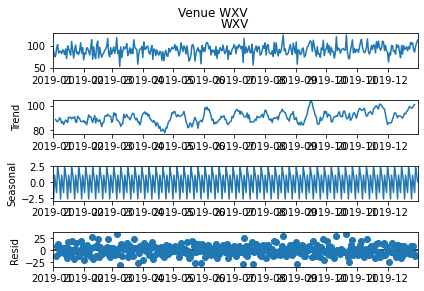

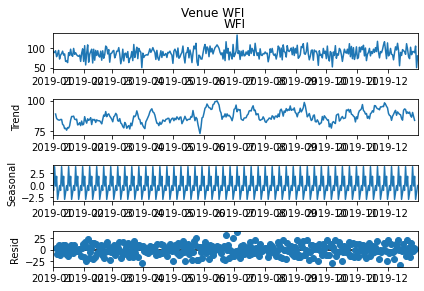

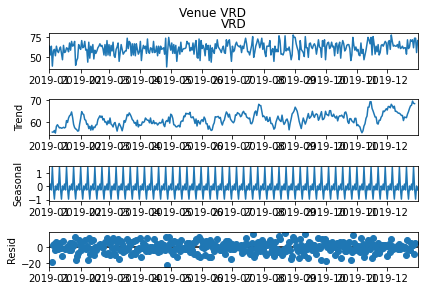

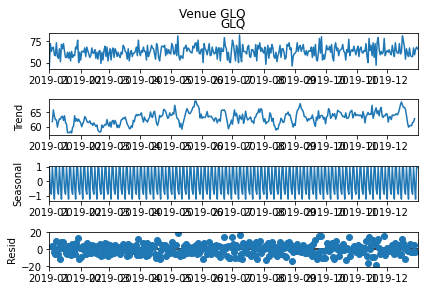

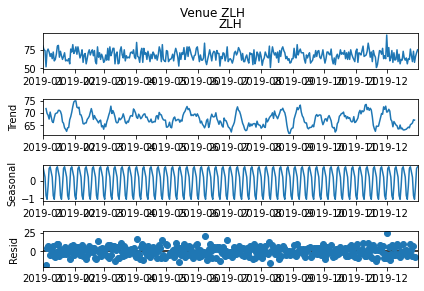

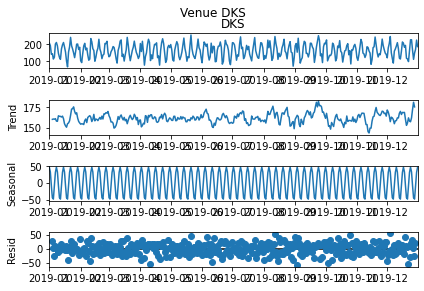

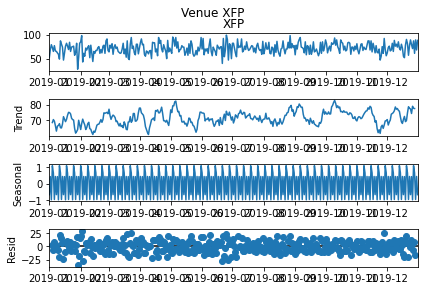

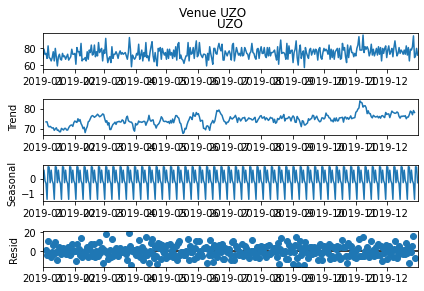

In [53]:
for name in Mselected:
    result = seasonal_decompose(VDailyVframe1[name], period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

### here, we display low time series seasonality means trend, seasonal and residual.

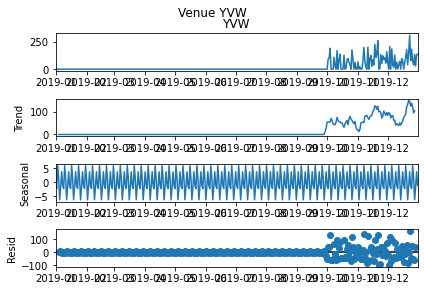

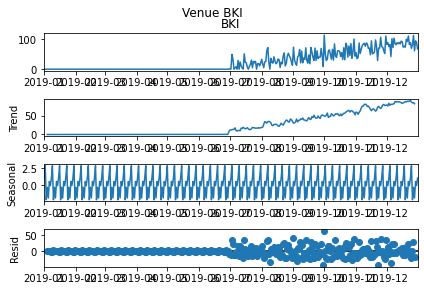

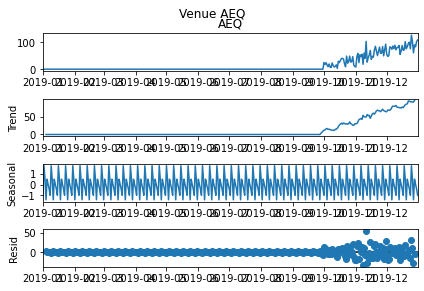

In [54]:
for name in Lselected:
    result = seasonal_decompose(VDailyVframe1[name], period=7)
    result.plot()
    plt.suptitle('Venue ' + name, position=(0.5, 1.0))
    plt.show()

## Investigation on SummaryData(dataFrame2)

### we create the bar graph according to our variables VS all venues

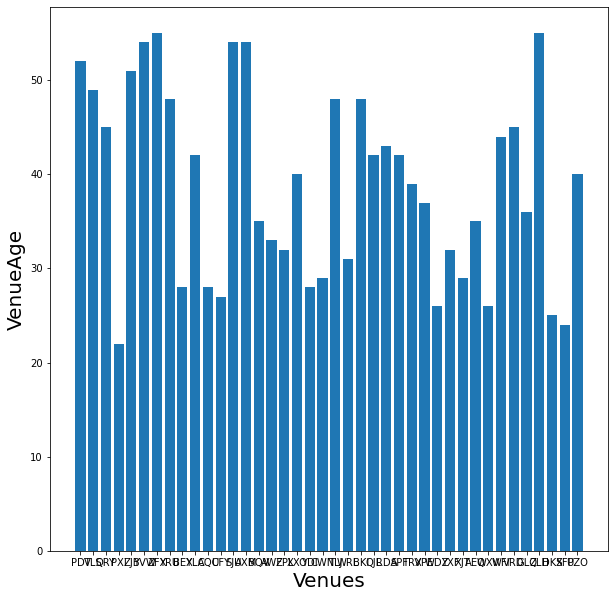

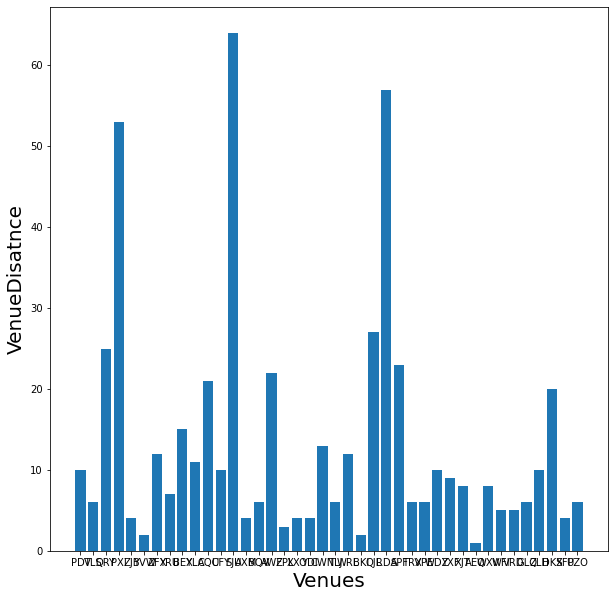

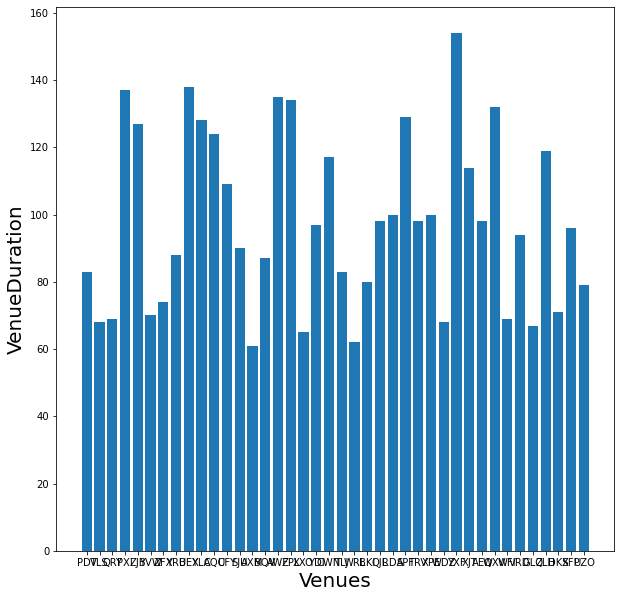

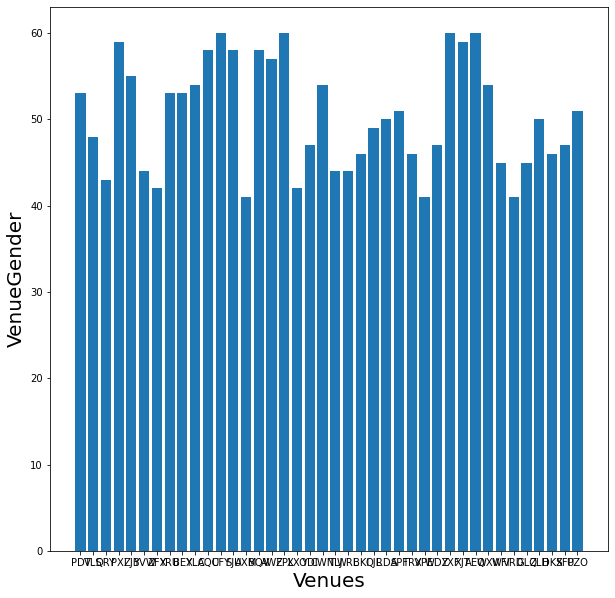

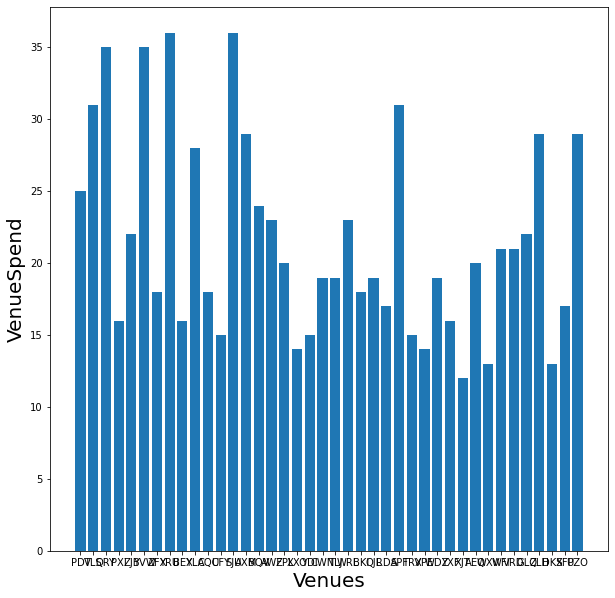

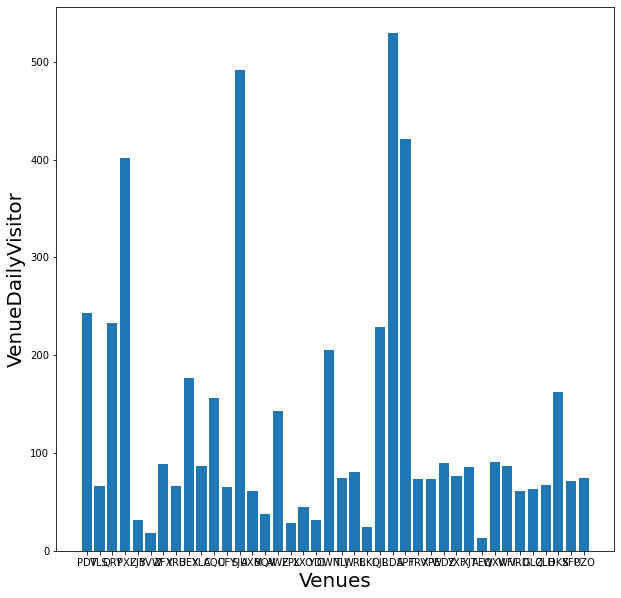

In [55]:
for i in combined_data:
    plt.figure(figsize=(10,10))
    x_pos= np.arange(len(combined_data.index))
    plt.bar(x_pos,combined_data[i],align = 'center')
    plt.xticks(x_pos, combined_data.index)
    plt.xlabel('Venues', fontsize=20)
    plt.ylabel(i, fontsize=20)
    plt.show()

### we created correlation between all variables VS all variables. How they are interrelationship between them. We can see high relationship between venue age VS venue spend, venue distance VS daily viaitors, and venue duration VS Venue gender.

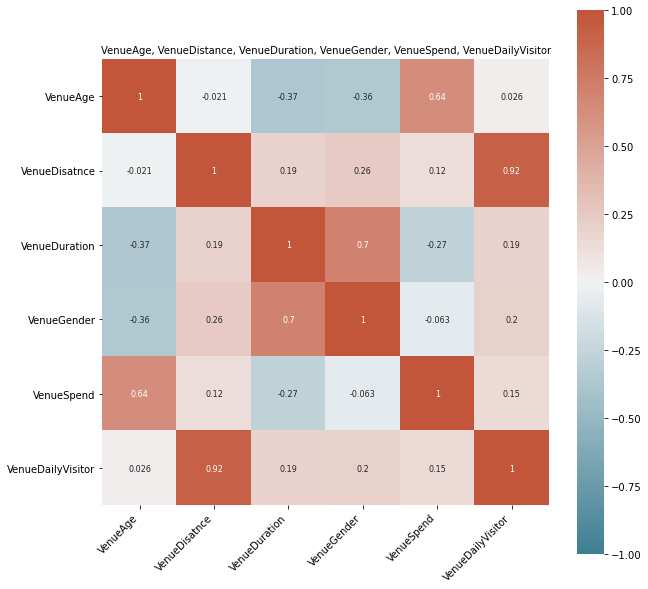

In [56]:
plt.figure(figsize=(10, 10))
corr = combined_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('VenueAge, VenueDistance, VenueDuration, VenueGender, VenueSpend, VenueDailyVisitor', fontsize=10)

plt.show()

### We visualize the bubble graph using three variables. One is venue distance, the second is venue duration, and the last one is venue spend. Along with this, we give a bubble size around 5. The biggest bubble size is 148 which shows the highest venue spent relationship between the longest distance Vs medium duration. Also, there are two bubble sizes nearly the highest bubble size which shows the minimum distance Vs medium duration.

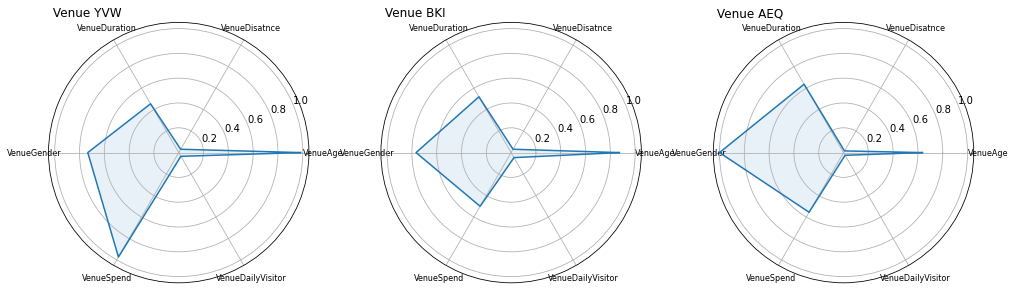

In [57]:
#radar plot

normalised_data = combined_data / combined_data.max()

n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(14, 8))
counter = 1
for name in Lselected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title(' Venue ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

### Here, I give a specific range for correlation values between 0.5 to -0.5 means -0.5 to 0 is a negative trend and 0 to 0.5 is a positive trend. The higher visitor venues trend is positive and the medium visitor venues trend is mixed negative and positive. Some of the venues are between our given limit means it’s neutral. But, ZJB, XXO, BQV, ZPL, and YDI venues are very famous during their establishment after that, popularity goes down, and then it increases in popularity. Now, those venues are average visitors.

In [58]:
menu_title = '### Select Venue'
variables = list(combined_data.columns)
def get_summary_plots(ax_x, ax_y, ax_z, bubble_scaling):
    combined_data['BubbleSize'] = combined_data[ax_z] / combined_data[ax_z].max() * math.exp(bubble_scaling)
    return combined_data.hvplot.scatter(frame_height=250, frame_width=500,
                                       title=ax_x + ' vs ' + ax_y + ' (vs ' + ax_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1,
                                       x=ax_x, y=ax_y, size='BubbleSize') 

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(ax_x.value, ax_y.value, ax_z.value, bubble_scaling.value)

ax_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=200)
ax_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=200)
ax_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=200)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=200)

variables_row = pn.Row(
    pn.Column(menu_title, ax_x, ax_y, ax_z, bubble_scaling),
    get_summary_plots(ax_x.value, ax_y.value, ax_z.value, bubble_scaling.value)
)


ax_x.param.watch(update_variables_row, 'value')
ax_y.param.watch(update_variables_row, 'value')
ax_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['VenueAge', 'VenueDisatnc...], value='VenueAge', width=200)
        [2] Select(name='Y-axis', options=['VenueAge', 'VenueDisatnc...], value='VenueDisatnce', width=200)
        [3] Select(name='Bubble', options=['VenueAge', 'VenueDisatnc...], value='VenueDuration', width=200)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, width=200)
    [1] HoloViews(Scatter)

### On this part, 

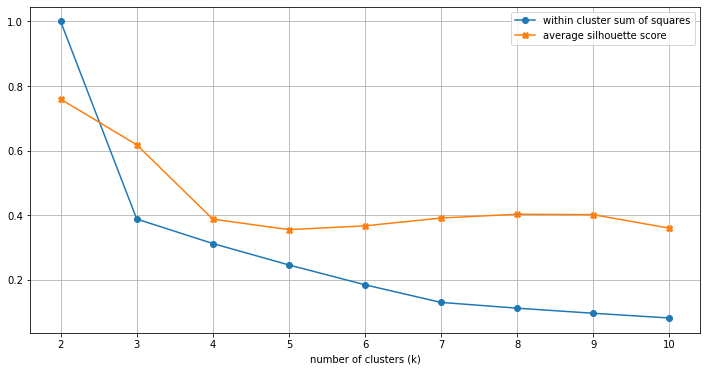

In [59]:
combined_data.drop('BubbleSize', inplace=True, axis=1)
selected = combined_data.columns 
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(combined_data[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(combined_data[selected], labels))
WCSS = np.asarray(WCSS) / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()

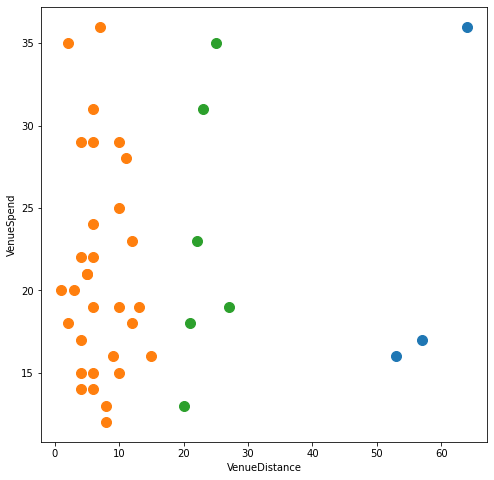

In [60]:
k=3
selected = combined_data.columns

selected = ['VenueSpend', 'VenueDisatnce']
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
combined_data['label'] = k_means.fit_predict(combined_data[selected])

clusters = []
for c in range(k):
    clusters.append(combined_data[combined_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['VenueDisatnce'], clusters[c]['VenueSpend'], s=100)
#for i, name in enumerate(summary_data.index):
    #plt.annotate(name, (summary_data['Revenue'][i] + 500, summary_data['Hits'][i]))
plt.xlabel('VenueDistance')
plt.ylabel('VenueSpend')
plt.show()